<a href="https://colab.research.google.com/github/tusharsgaidhane/Cardiovascular-Risk-Prediction/blob/main/PS_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Cardiovascular Risk Prediction<b/>

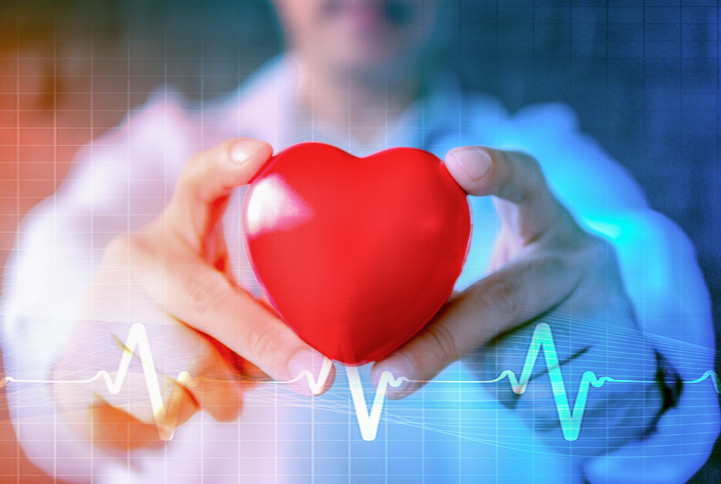

## **Introduction**

**Problem:** The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk.

**Dataset**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.


**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


**Data Description**

**Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)




**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke(Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target)**
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#preprocessing
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


# Modelling Helpers
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
hfdf = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/3. UnS ML: Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [6]:
hfdf.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
hfdf.shape

(3390, 17)

In [8]:
hfdf.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
hfdf.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
hfdf.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [11]:
missing_data = hfdf.isnull().sum()
total_percentage = (missing_data.sum()/hfdf.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [12]:
# percentage of missing data per category
total = hfdf.isnull().sum().sort_values(ascending=False)
percent_total = (hfdf.isnull().sum()/hfdf.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


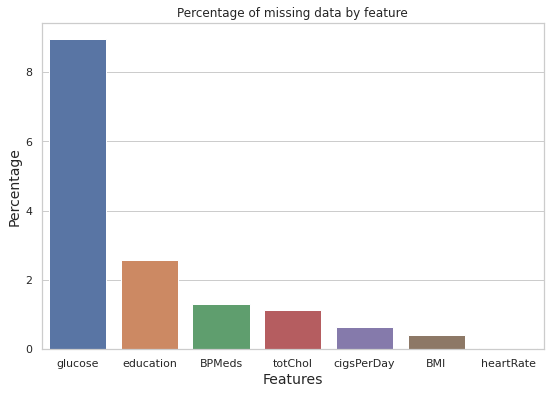

In [13]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

At 8.96%, the blood glucose entry has the highest percentage of missing data. 

In [14]:
# Let us check the mode values of some of the features having missing values:
print('Mode Value of Glucose:', (hfdf["glucose"].mode())[0])
print('Mode Value of Cigarettes Consumed Per day:', (hfdf["cigsPerDay"].mode())[0])
print('Mode Value of Total Cholestrol:', (hfdf["totChol"].mode())[0])

Mode Value of Total Cholestrol: 240.0


In [15]:
# Filling missing values:

hfdf["glucose"].fillna((hfdf["glucose"].mode())[0], inplace=True)
hfdf["cigsPerDay"].fillna((hfdf["cigsPerDay"].mode())[0], inplace=True)
hfdf["totChol"].fillna((hfdf["totChol"].mode())[0], inplace=True)

In [16]:
# Let us check the percentage of null values we are left with now:
missing_data = hfdf.isnull().sum()
total_percentage = (missing_data.sum()/hfdf.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 4.31%


So, now we are left with only 4.31% of null values and the features which remained with null values, have very few missing entries. Thus, we can drop these null entries without losing alot of data.

In [17]:
hfdf.dropna(axis=0, inplace=True)
hfdf.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Also, let's drop the column of "ID" as it is not contributing anything.

In [18]:
hfdf = hfdf.drop(['id'], axis=1)

In [19]:
hfdf.shape

(3245, 16)

###Let's check for Outliers:

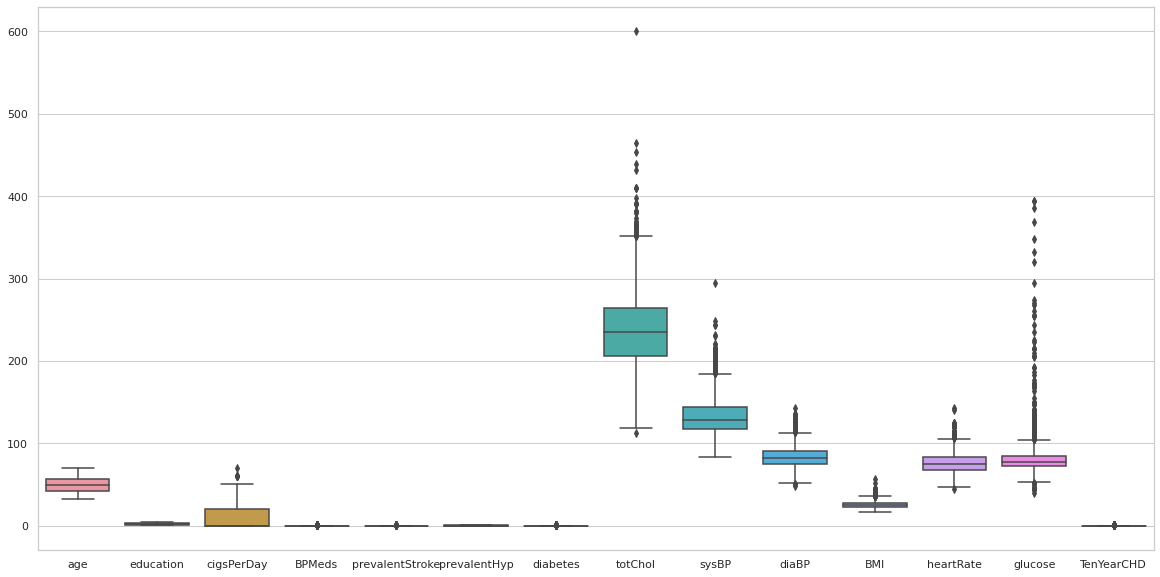

In [20]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=hfdf)
plt.show()

Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [21]:
print('The Outlier present in totChol is:', hfdf['totChol'].max())
print('The Outlier present in sysBP is:', hfdf['sysBP'].max())

The Outlier present in totChol is: 600.0
The Outlier present in sysBP is: 295.0


In [22]:
hfdf = hfdf[hfdf['totChol']<600.0]
hfdf = hfdf[hfdf['sysBP']<295.0]
hfdf.shape

(3243, 16)

#<b>EDA<b/>

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.167988,-0.184802,0.128522,0.042891,0.308422,0.105642,0.282221,0.403560,0.224204,0.134726,0.003539,0.107673,0.223589
education,-0.167988,1.000000,0.009701,-0.020106,-0.025687,-0.082841,-0.048385,-0.021541,-0.134260,-0.061035,-0.132045,-0.050167,-0.035996,-0.050833
cigsPerDay,-0.184802,0.009701,1.000000,-0.036255,-0.043749,-0.077068,-0.045786,-0.022621,-0.098506,-0.064998,-0.094585,0.059511,-0.061896,0.065127
BPMeds,0.128522,-0.020106,-0.036255,1.000000,0.128838,0.260154,0.065438,0.088066,0.270005,0.202789,0.087936,0.020813,0.065128,0.094801
prevalentStroke,0.042891,-0.025687,-0.043749,0.128838,1.000000,0.061458,0.013839,-0.002661,0.055197,0.051686,0.024211,-0.012777,0.021513,0.047541
prevalentHyp,0.308422,-0.082841,-0.077068,0.260154,0.061458,1.000000,0.072715,0.155836,0.701559,0.614604,0.301804,0.154938,0.080129,0.161758
diabetes,0.105642,-0.048385,-0.045786,0.065438,0.013839,0.072715,1.000000,0.047622,0.106040,0.057121,0.083154,0.036386,0.607353,0.090245
totChol,0.282221,-0.021541,-0.022621,0.088066,-0.002661,0.155836,0.047622,1.000000,0.202963,0.160253,0.118219,0.087369,0.059070,0.088100
sysBP,0.403560,-0.134260,-0.098506,0.270005,0.055197,0.701559,0.106040,0.202963,1.000000,0.783829,0.333768,0.180443,0.130679,0.204244
diaBP,0.224204,-0.061035,-0.064998,0.202789,0.051686,0.614604,0.057121,0.160253,0.783829,1.000000,0.384175,0.175736,0.071393,0.133040


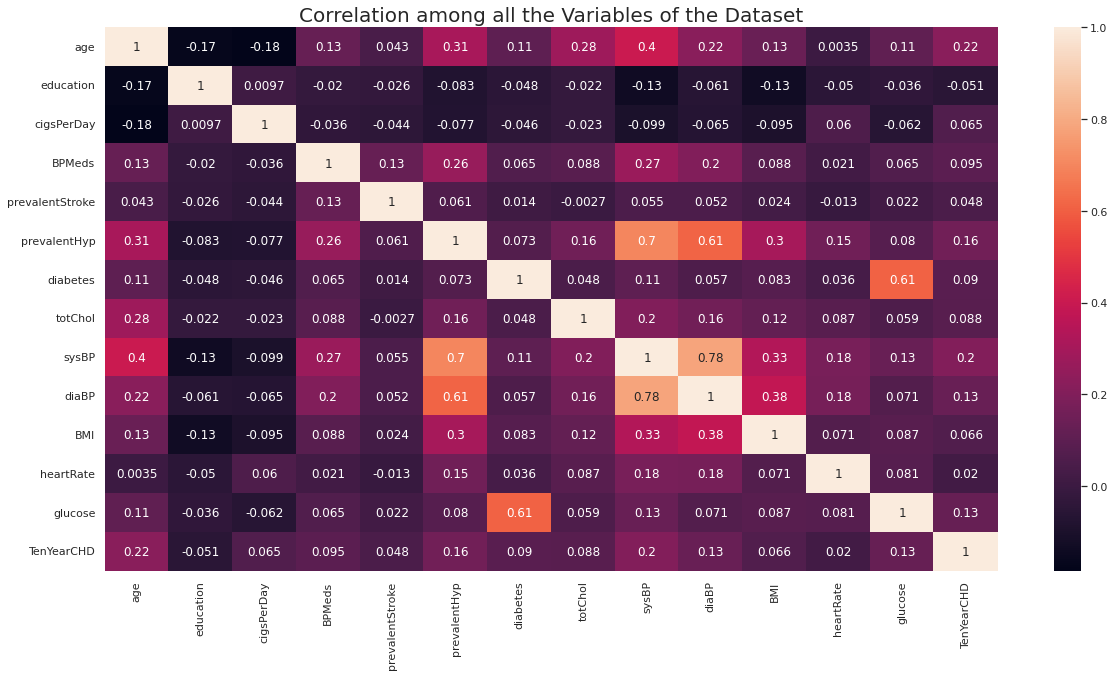

In [23]:
#Checking relationship between variables
cor=hfdf.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

###<b>Data Distribution</b>

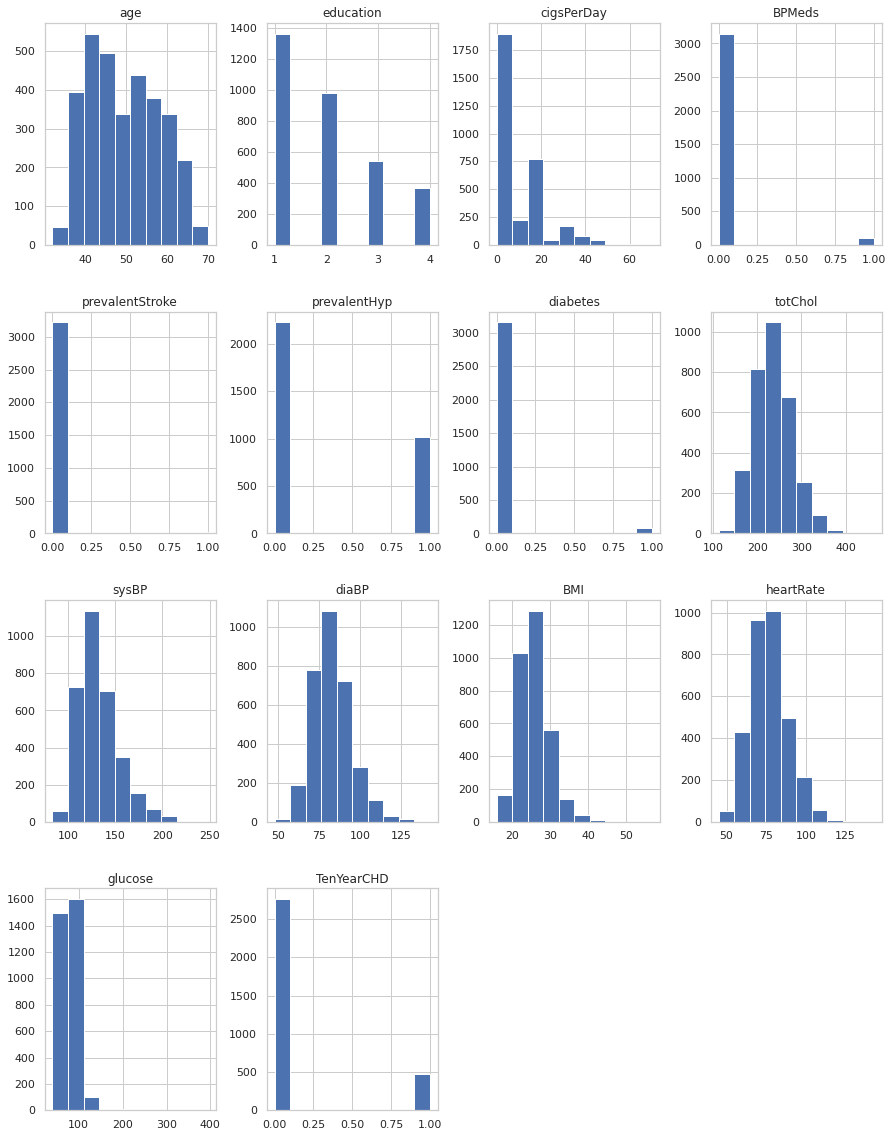

In [24]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
hfdf.hist(ax = ax)
plt.show()

The data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced

### <b>Case counts</b>

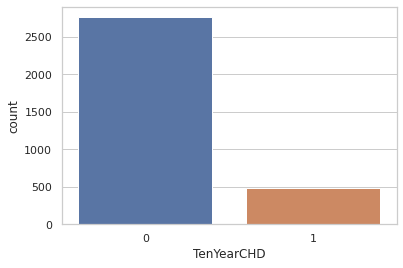

There are 2762 patients without heart disease and 481 patients with the disease


In [25]:
sns.countplot(x='TenYearCHD',data=hfdf)
plt.show()
cases = hfdf.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

<b>Number of people who have disease vs age<b/>

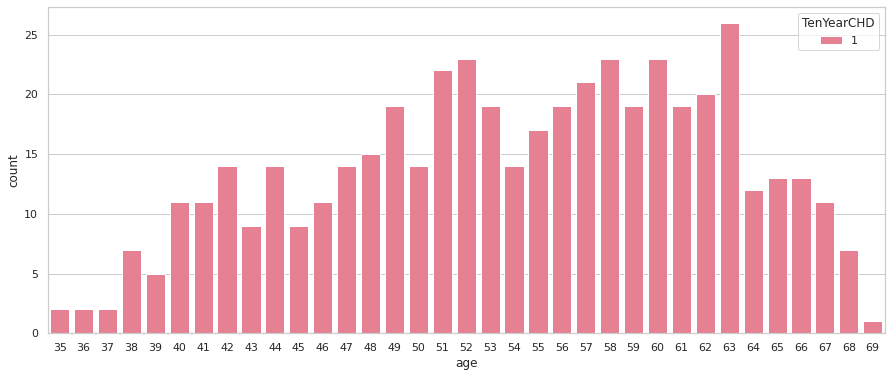

In [26]:
positive_cases = hfdf[hfdf['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

The people with the highest risk of developing CHD are betwwen the ages of 52 and 63

The number of sick people generally increases with age

<b>Countplot of people based on their sex and whether they are Current Smoker or not<b/>


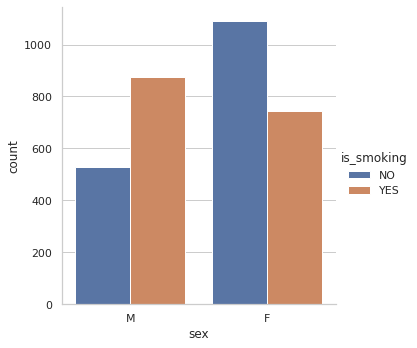

In [27]:
sns.catplot(data=hfdf, kind='count', x='sex',hue='is_smoking')
plt.show()

<b>Countplot - subplots of No. of people affecting with CHD on basis of their sex and current smoking.<b/>

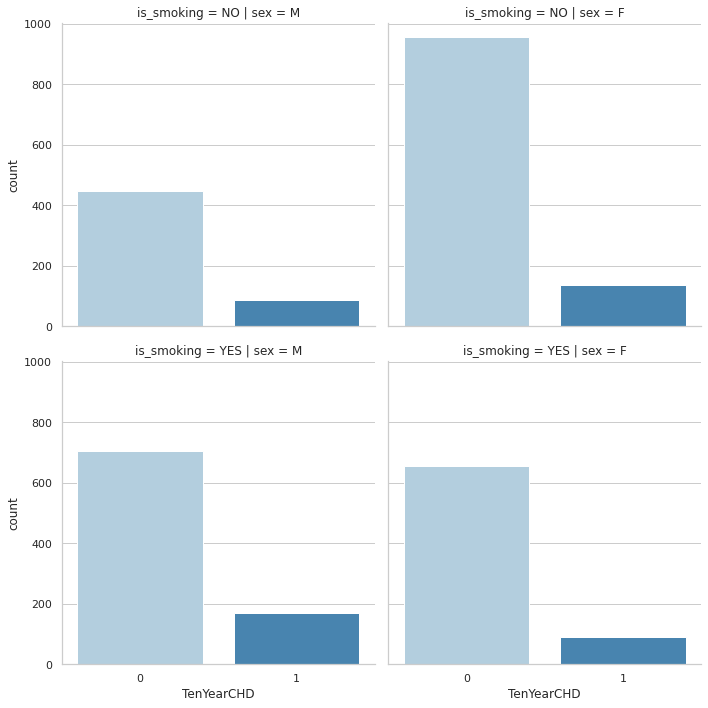

In [28]:
sns.catplot(data=hfdf, kind='count', x='TenYearCHD', col='sex',row='is_smoking', palette='Blues')
plt.show()

##<b>Dealing with Categorical Variables<b/>

Here we have two categorical variables i.e., 'sex' and 'is_smoking' which need to be converted into numerical form for the analysis.

In [29]:
hfdf['sex'].value_counts()

F    1837
M    1406
Name: sex, dtype: int64

Let's replace 'F' with 0 and 'M' with 1

In [30]:
hfdf['sex'] = hfdf['sex'].replace({'F':0, 'M':1})

In [31]:
hfdf['sex'].value_counts()

0    1837
1    1406
Name: sex, dtype: int64

Now, let's look for the values in 'is_smoking' column

In [32]:
hfdf['is_smoking'].value_counts()

YES    1622
NO     1621
Name: is_smoking, dtype: int64

Let's replace 'YES' with 1 and 'NO' with 0.

In [33]:
hfdf['is_smoking'] = hfdf['is_smoking'].replace({'YES':1, 'NO':0})
hfdf['is_smoking'].value_counts()

1    1622
0    1621
Name: is_smoking, dtype: int64

In [34]:
hfdf

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


##<b>SPLITTING DATA - TRAINING AND TESTING SETS<b/>

In [35]:
## importing packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [37]:
## Defining variables X,y 
X = hfdf.drop("TenYearCHD",axis=1)
y = hfdf["TenYearCHD"]
print("Columns in X :",X.columns)
print("y :",y)
print("shape of X:",X.shape)
print("shape of y:",y.shape[0])

Columns in X : Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
y : 1       0
2       0
3       1
4       0
5       1
       ..
3384    0
3385    0
3386    0
3387    1
3389    0
Name: TenYearCHD, Length: 3243, dtype: int64
shape of X: (3243, 15)
shape of y: 3243


In [38]:
## Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##<b>MODEL TRAINING<b/>

In [39]:
## Scaling the data 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

##<b>MODEL BUILDING<b/>

The four algorithms that we will be using are:

1. Logistic Regression
2. k-Nearest Neighbours
3. Decision Trees
4. Support Vector Machine


###<b>Logistic Regression Model<b/>

The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a logit transformation of the probability of presence of the characteristic of interest:logit function

Rather than choosing parameters that minimize the sum of squared errors (like in ordinary regression), estimation in logistic regression chooses parameters that maximize the likelihood of observing the sample values.

In [40]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [41]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [42]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [43]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 86.07%


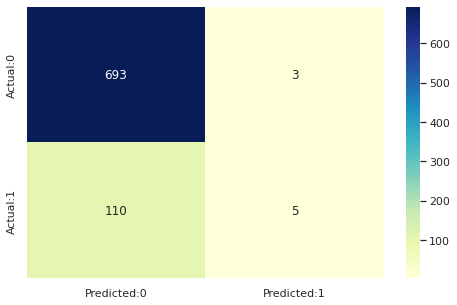

In [44]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [45]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       696
           1       0.62      0.04      0.08       115

    accuracy                           0.86       811
   macro avg       0.74      0.52      0.50       811
weighted avg       0.83      0.86      0.81       811



In [46]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 8.13%


###<b>PREDICT PROBA<b/>

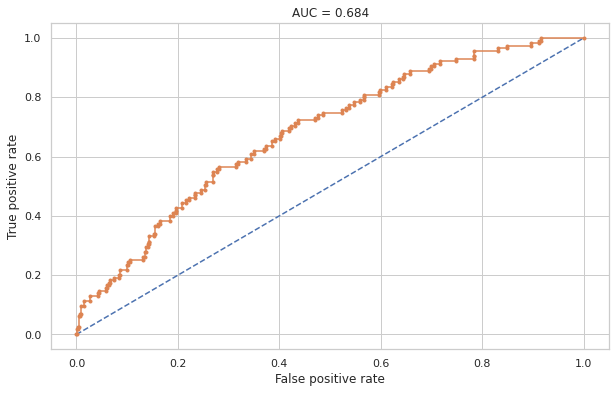

In [47]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

###<b>K-NEAREST NEIGHBOURS (KNN)<b/>

The k-nearest-neighbors is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [50]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 6}

In [52]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [53]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 84.34%


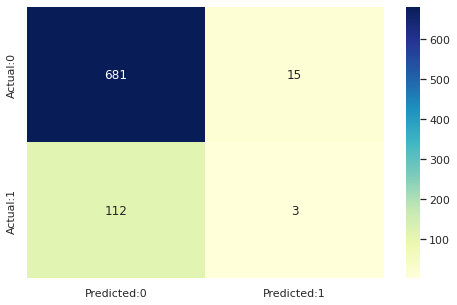

In [54]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [55]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       696
           1       0.17      0.03      0.05       115

    accuracy                           0.84       811
   macro avg       0.51      0.50      0.48       811
weighted avg       0.76      0.84      0.79       811



In [56]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 4.51%


###<b>PREDICT PROBA for KNN<b/>

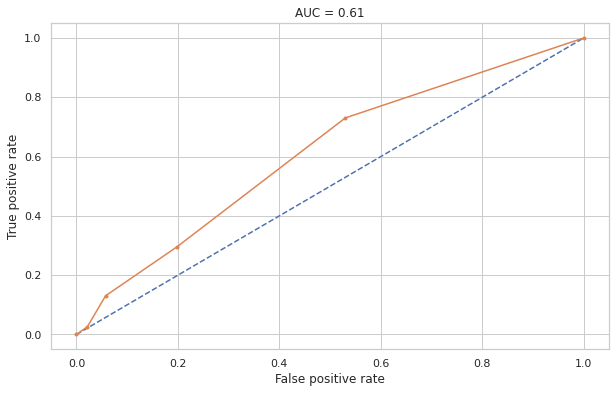

In [57]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

###<b>Decesion Tree<b/>

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [60]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [61]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 15}

In [62]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [63]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 81.75%


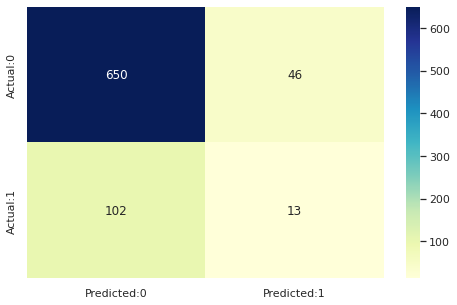

In [64]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [65]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       696
           1       0.22      0.11      0.15       115

    accuracy                           0.82       811
   macro avg       0.54      0.52      0.52       811
weighted avg       0.77      0.82      0.79       811



In [66]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 14.94%


###<b>PREDICT PROBA for DT<b/>

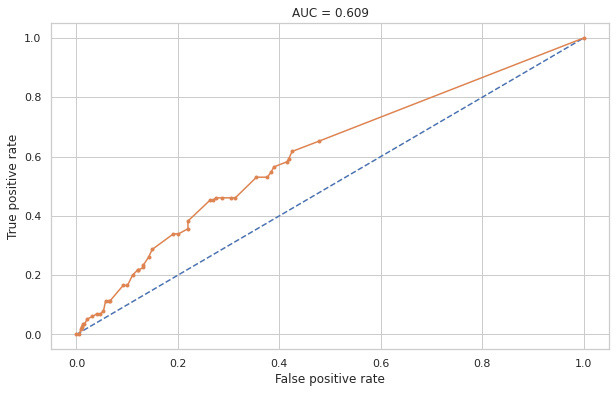

In [67]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()